In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/Cleaned Data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [ ]:
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)

In [ ]:
df.MentallyIll

,MentallyIll
0,0
1,1
2,0
3,0
4,1
...,...
329,0
330,0
331,0
332,1


In [ ]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)
df = df.iloc[1:]
df.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
5,1,0,High School or GED,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 1 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    333 non-null    int64  
 1   MentallyIll                                                   333 non-null    int64  
 2   Education                                                     333 non-null    object 
 3   I have my own computer separate from a smart phone            333 non-null    int64  
 4   I have been hospitalized before for my mental illness         333 non-null    int64  
 5   How many days were you hospitalized for your mental illness   333 non-null    float64
 6   I am legally disabled                                         333 non-null    int64  
 7   I have my regular access to the internet                      333 non-n

In [ ]:
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)

In [ ]:
income = pd.to_numeric(df.Income)

In [ ]:
income.describe()

,Income
count,333.000000
mean,37.432432
std,30.697402
min,0.000000
25%,12.000000
50%,30.000000
75%,55.000000
max,100.000000


<Axes: xlabel='count', ylabel='Education'>

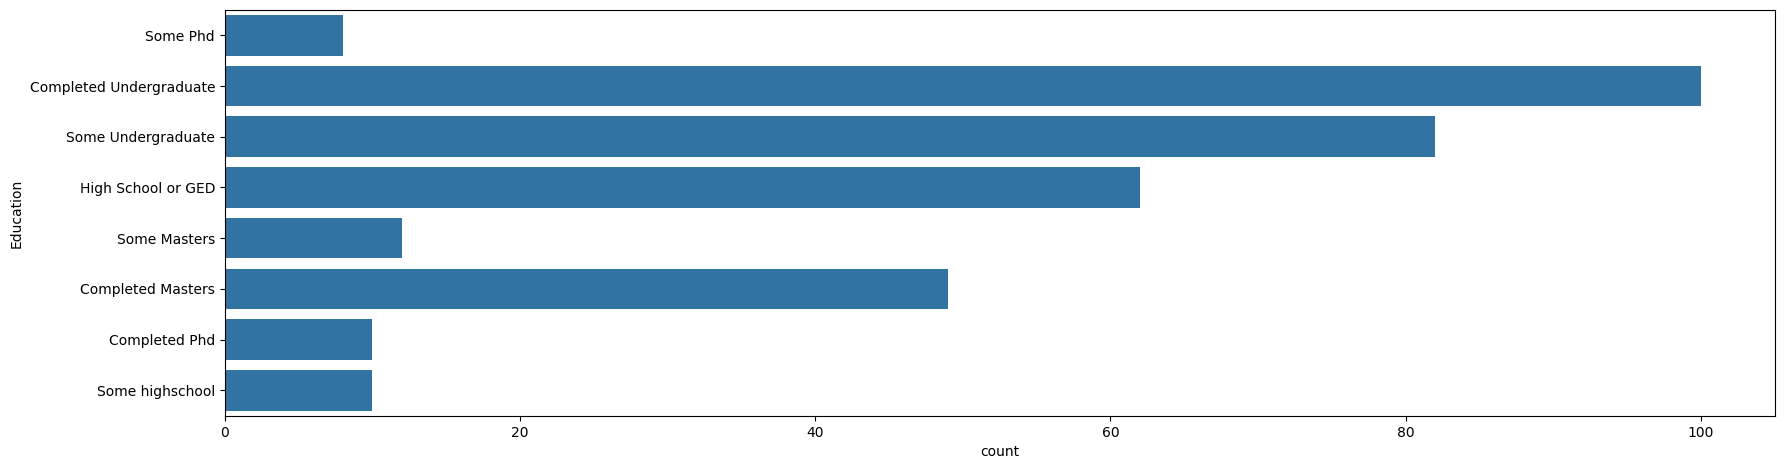

In [ ]:
a4_dims = (20, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Education)

In [ ]:
edu = df.Education.to_frame().to_records()

In [ ]:
df.columns

Index(['I am currently employed at least part-time', 'MentallyIll',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.', 'Income',
       'Unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object')

In [ ]:
mental = df.MentallyIll.to_frame().to_records()
income = df.Income.to_frame().to_records()
unemployed = df.Unemployed.to_frame().to_records()
gender = df.Gender.to_frame().to_records()
age = df.Age.to_frame().to_records()

In [ ]:
sixty, fifty, thirty, twenty = [], [], [], []
for i in age:
    if i[1] == '> 60':
        sixty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '45-60':
        fifty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '30-44':
        thirty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '18-29':
        twenty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))


In [ ]:
age_list = [sixty, fifty, thirty, twenty]
title_age_list = ['Sixties', 'Fifties', 'Thirties', 'Twenties']
j = 0;
for i in age_list:
    x_val = sorted([x[1] for x in i])
    unemp = [x[2] for x in i]

    x_int = []
    for i in x_val:
        x_int.append(int(i))

    print(title_age_list[j], '-- Percent Unemployed:', sum(unemp)/len(unemp))
    j = j+1

Sixties -- Percent Unemployed: 0.325
Fifties -- Percent Unemployed: 0.18181818181818182
Thirties -- Percent Unemployed: 0.24509803921568626
Twenties -- Percent Unemployed: 0.3076923076923077


In [ ]:
completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters = [], [], [], [],[], [], [], []
for i in edu:
    if i[1] == 'Completed Masters':
        completed_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Undergraduate':
        completed_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'High School or GED':
        high_school.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Phd':
        some_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Phd':
        completed_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some highschool':
        some_highschool.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Undergraduate':
        some_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    else:
        some_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))

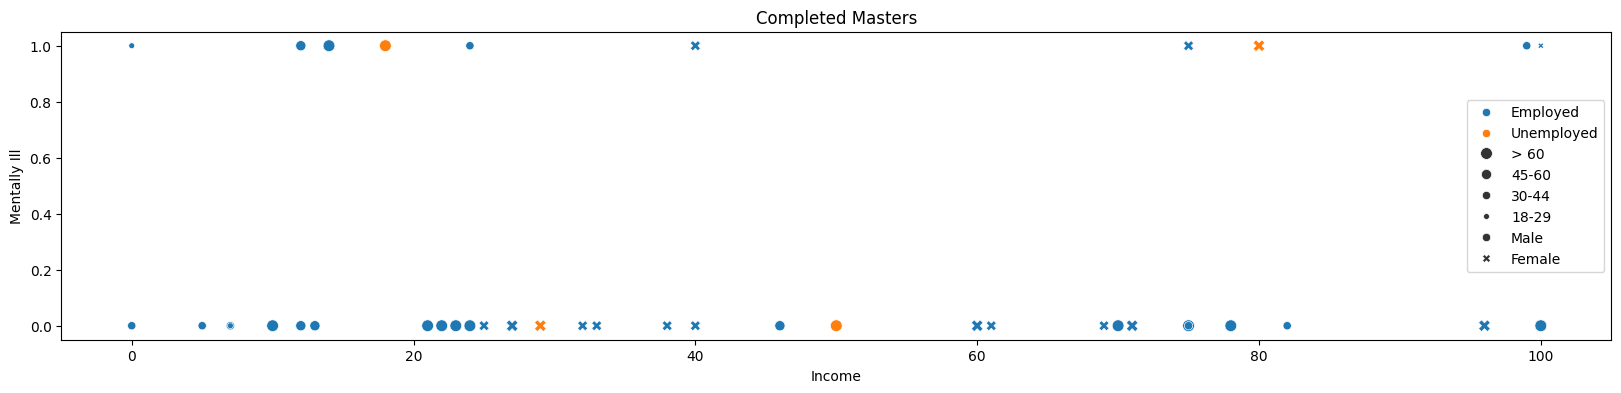

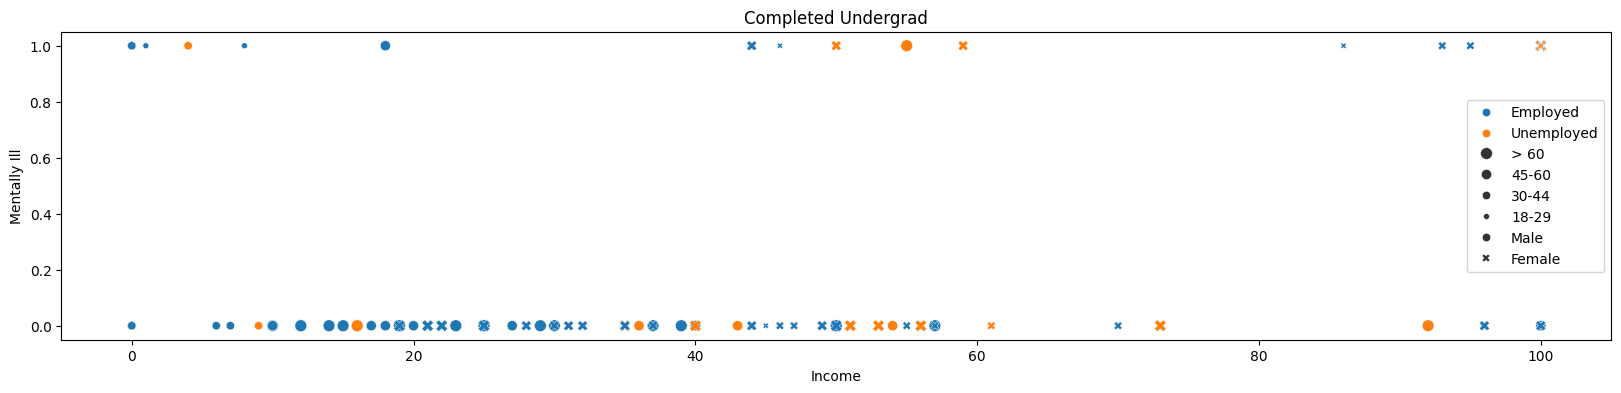

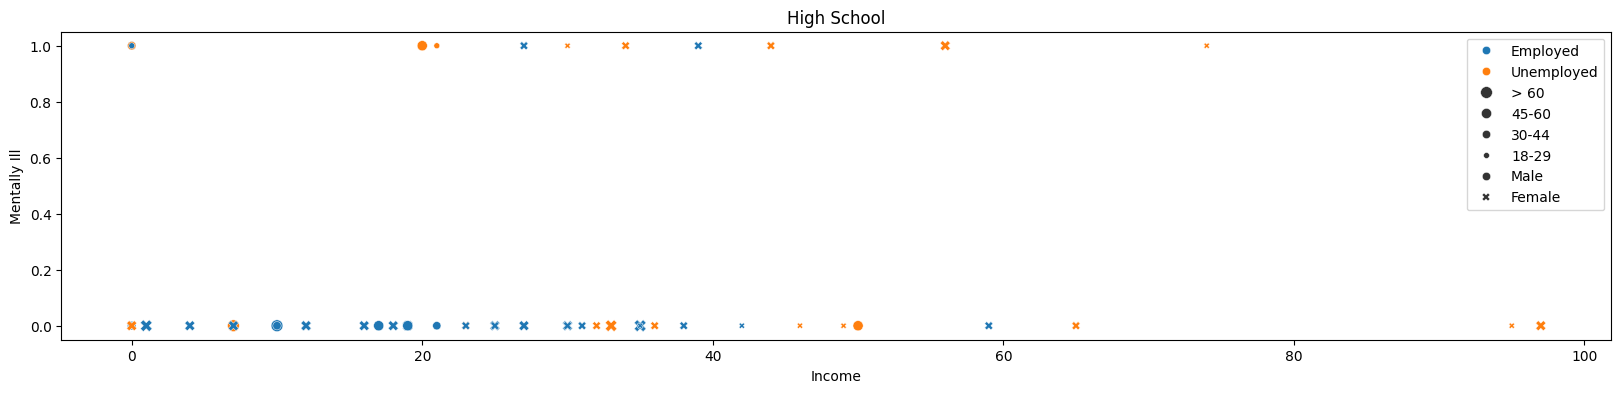

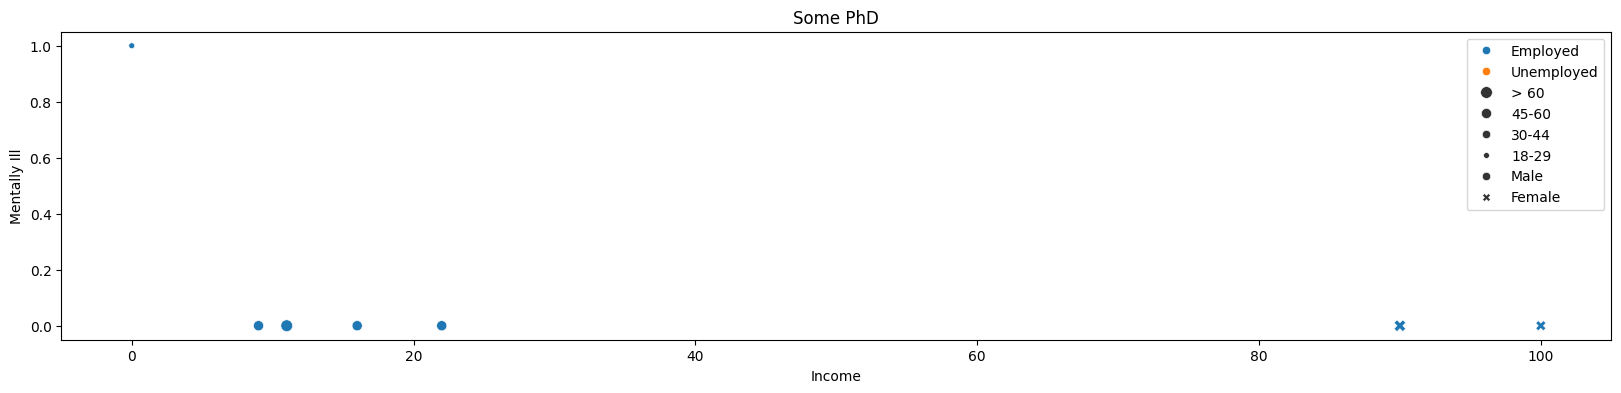

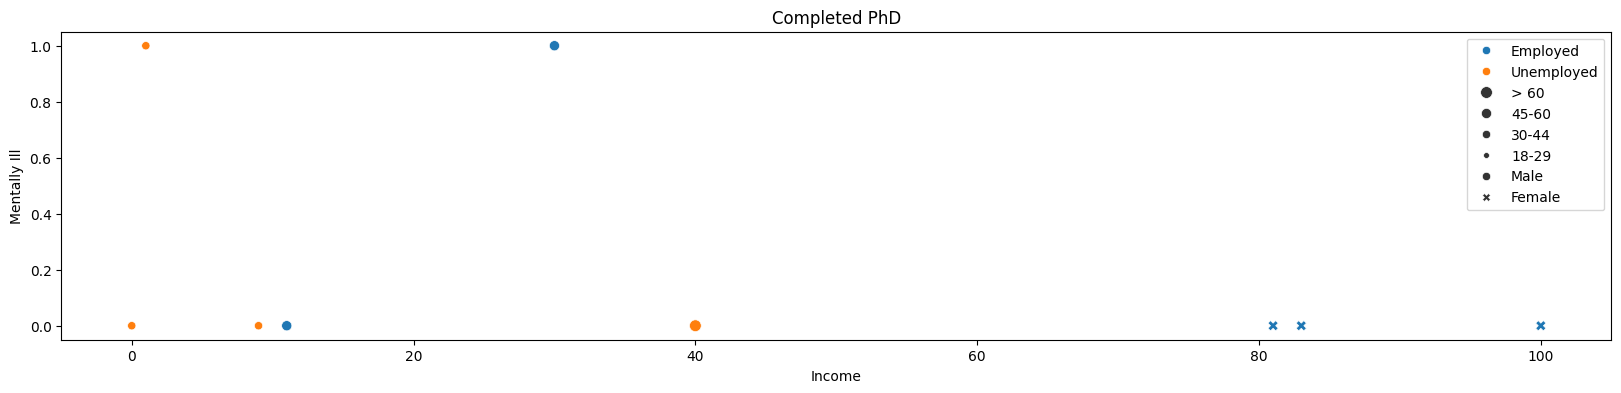

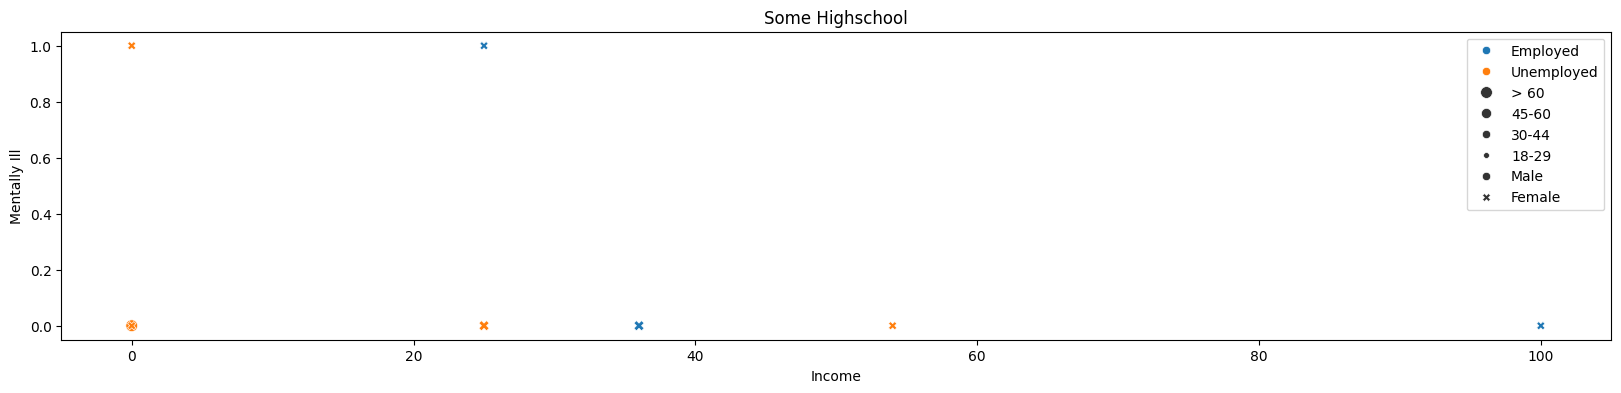

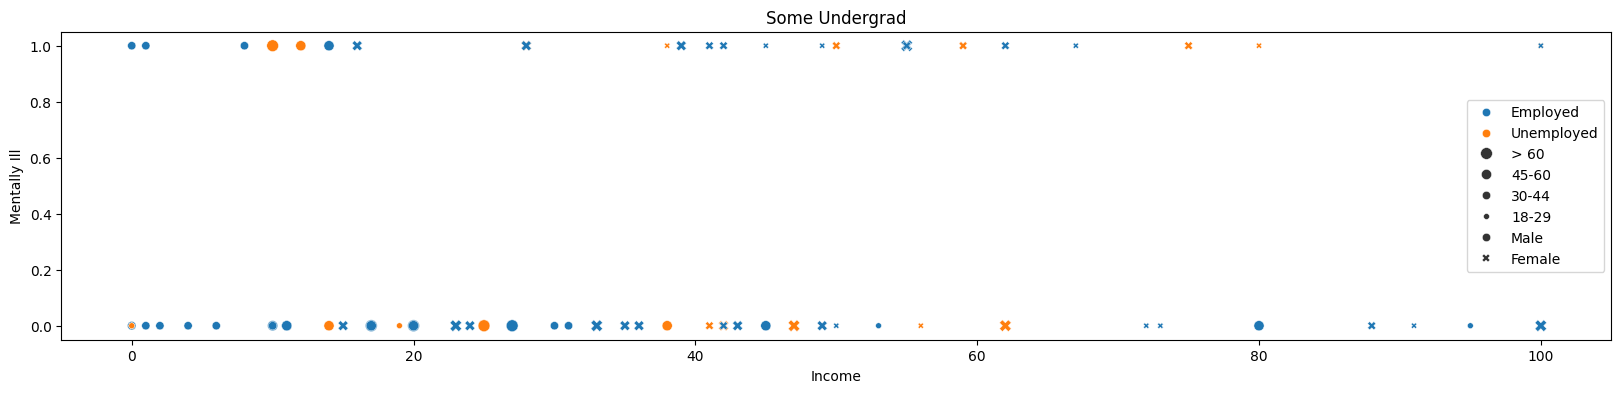

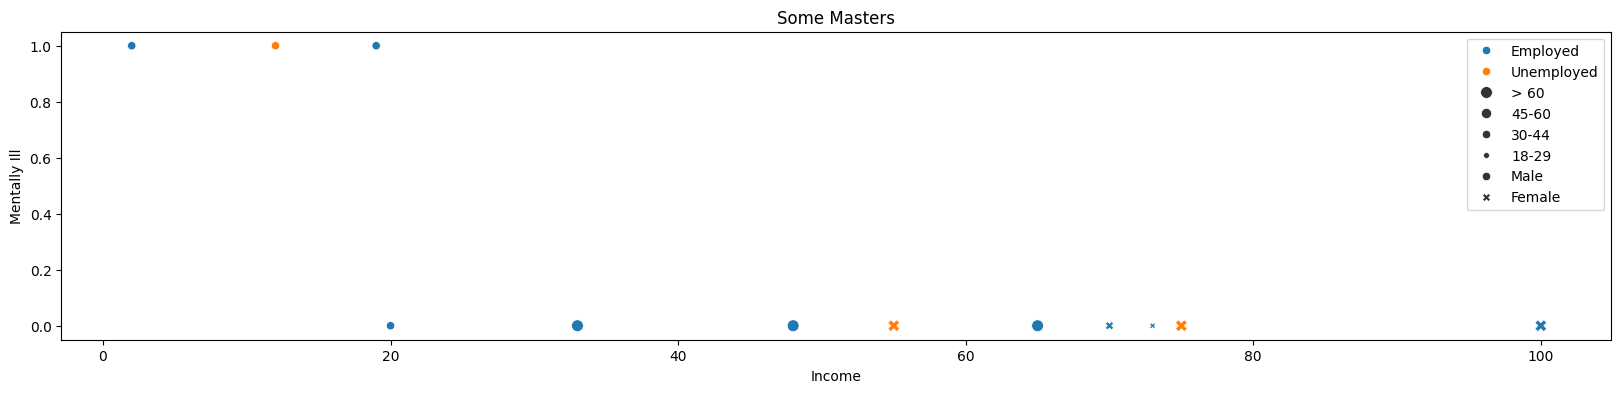

In [ ]:
tot_list = [completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters]
title_list = ['Completed Masters', 'Completed Undergrad', 'High School', 'Some PhD', 'Completed PhD', 'Some Highschool', 'Some Undergrad', 'Some Masters']
j = 0;
for i in tot_list:

    x_val = sorted([x[2] for x in i])
    y_val = [x[1] for x in i]
    unemp = [x[3] for x in i]
    gend = [x[4] for x in i]
    age = [x[5] for x in i]

    x_int = []
    for i in x_val:
        x_int.append(int(i))


    for i in range(len(unemp)):
        if unemp[i] == 1:
            unemp[i] = 'Unemployed'
        elif unemp[i] == 0:
            unemp[i] = 'Employed'

    a4_dims = (20, 4)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.scatterplot(x = x_int, y=y_val,
                        hue=unemp, hue_order = ('Employed', 'Unemployed'),
                        style=gend,
                        size=age, size_order = ('> 60', '45-60', '30-44','18-29'))
    ax.set(xlabel='Income', ylabel='Mentally Ill')
    plt.title(title_list[j])
    j = j+1

In [ ]:
df2 = df

df2 = df2.iloc[:, :-3]

df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression',
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior',
                   'Mood swings', 'Tiredness'], 1)

df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])

df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])

df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters',
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [ ]:
df2.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
1,1,1,6,1,0,0.0,0,1,0,0,...,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23,1
2,1,0,3,1,0,0.0,0,1,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
3,0,0,2,1,0,0.0,0,1,1,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
4,1,1,3,1,1,35.0,1,1,0,1,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37,1
5,1,0,1,1,0,0.0,0,1,1,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1


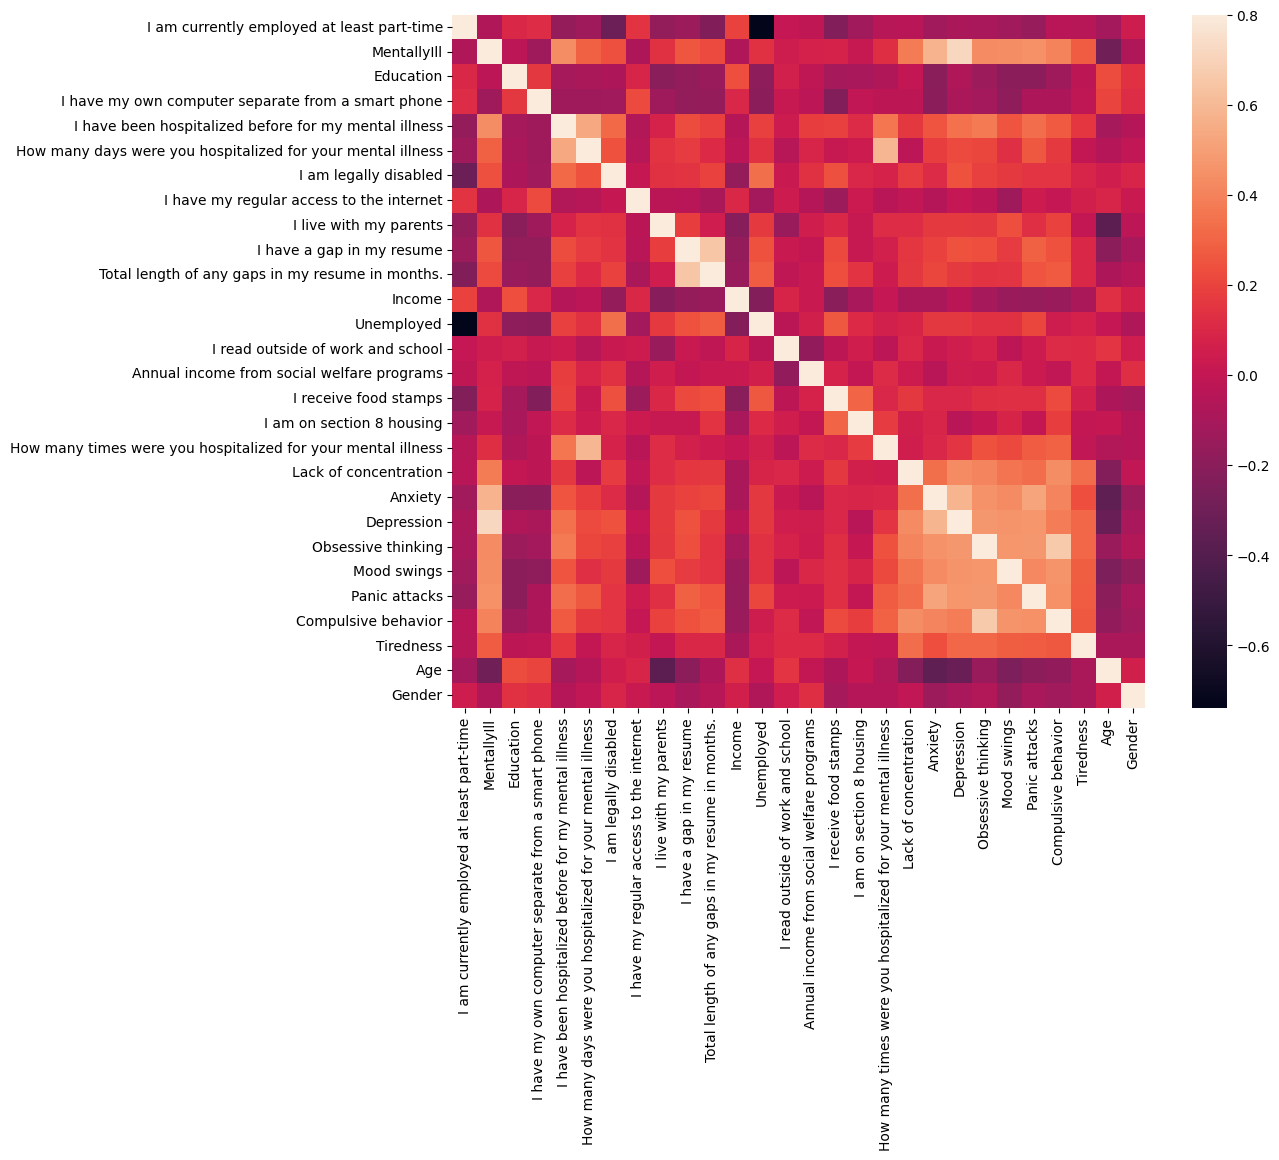

In [ ]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

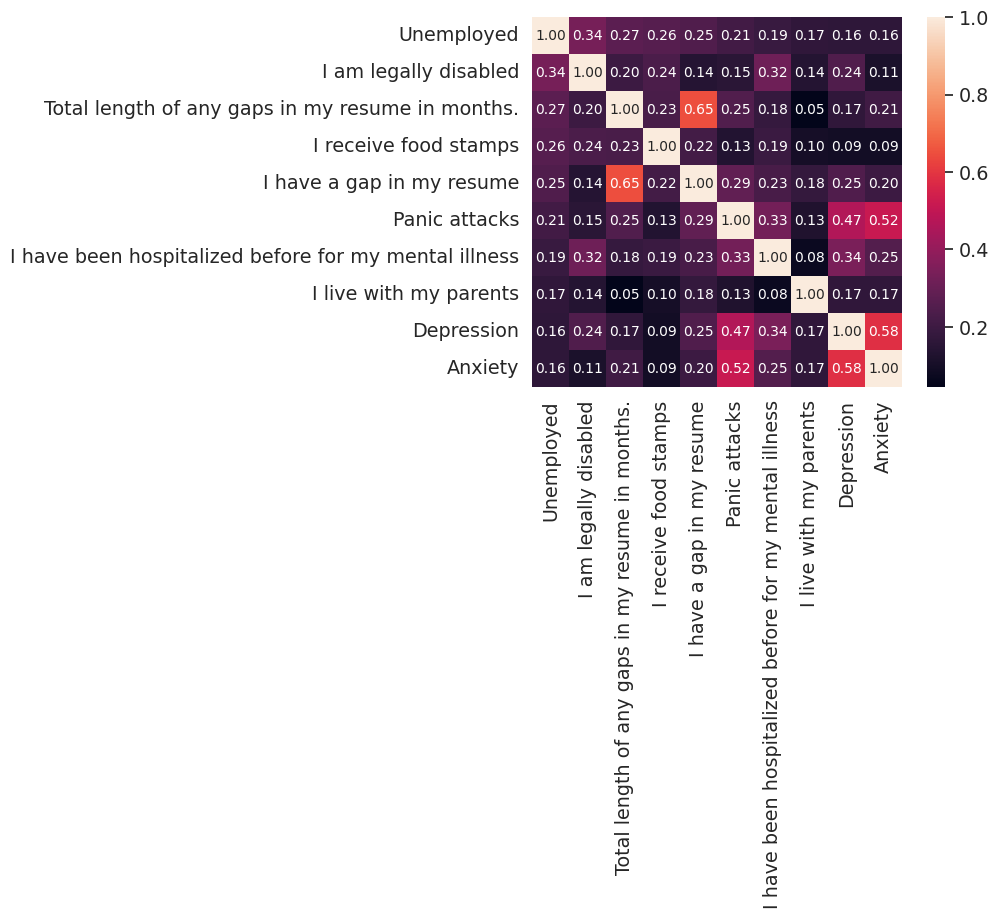

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'Unemployed')['Unemployed'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

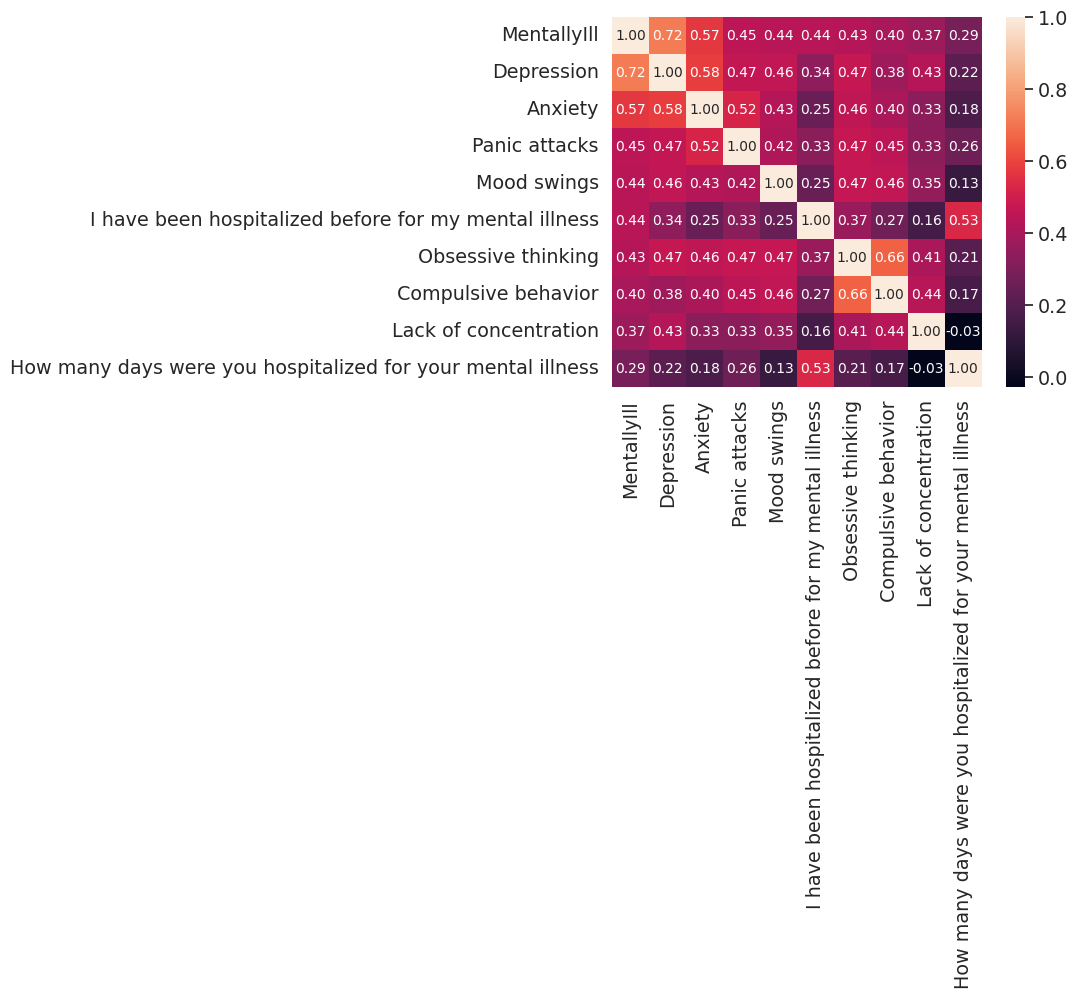

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'MentallyIll')['MentallyIll'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df3 = df2.copy()
df4 = df2.copy()
df5 = df2.copy()
target=df2['MentallyIll']
df2.drop(['MentallyIll'],axis=1,inplace=True)

In [ ]:
X = df2
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest = RandomForestClassifier(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
print(forest.score(X_test,y_test))

0.9104477611940298


<Axes: xlabel='feature'>

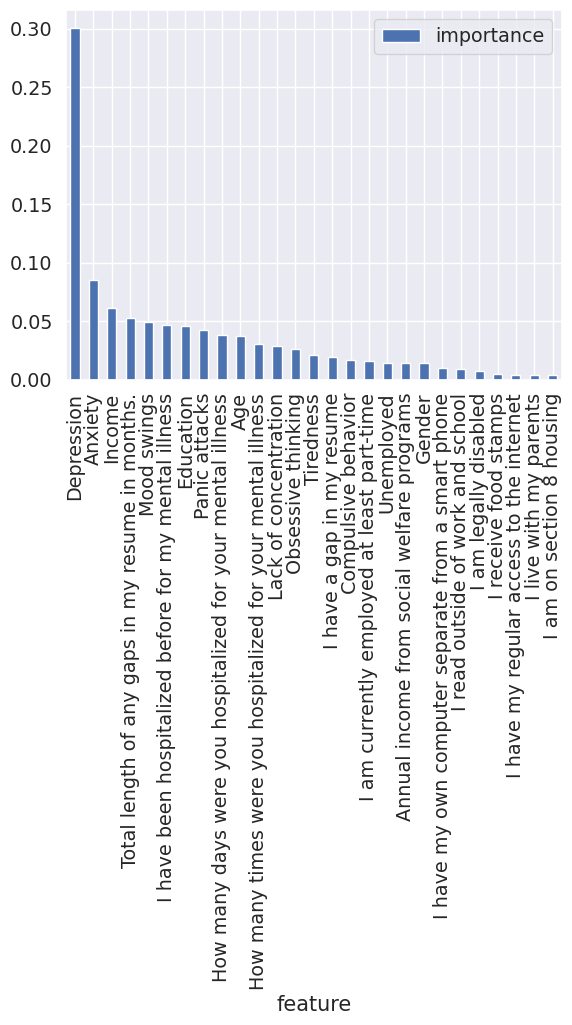

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[185,  15],
       [ 19,  47]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

from sklearn.metrics import f1_score
f1_score(y_train, predictions)

Precision: 0.7580645161290323
Recall: 0.7121212121212122


0.734375